In [1]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
import os
import cv2 as cv
from cv2.data import haarcascades
import matplotlib.pyplot as plt

In [2]:
# Get the dataset labels using the dataset folder
labels = os.listdir('data/dataset')
labels

['Closed', 'no_yawn', 'yawn', 'Open']

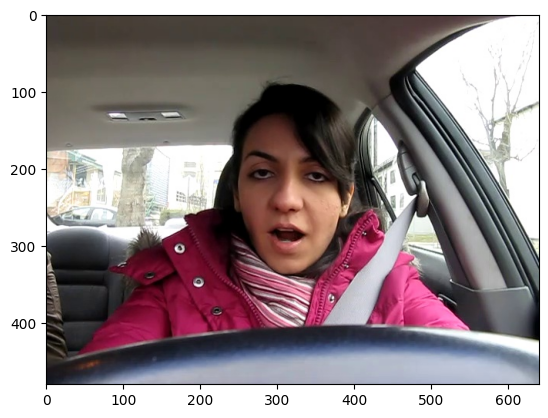

In [3]:
# Open random image from the dataset to see the image
plt.imshow(plt.imread('data/dataset/yawn/10.jpg'))
test_image = cv.imread('data/dataset/yawn/10.jpg')

In [4]:
# Load the cascade for the face detection using the haarcascades from OpenCV
face_cascade = haarcascades + "haarcascade_frontalface_default.xml"
face_cascade

'/Users/isabukhari/School/ECS174/ECS174Project/.venv/lib/python3.12/site-packages/cv2/data/haarcascade_frontalface_default.xml'

In [5]:
# Use the cascade to detect the face in the image using a CascadeClassifier
face_cascade_classifier = cv.CascadeClassifier(face_cascade)
face_cascade_classifier

< cv2.CascadeClassifier 0x16bb959b0>

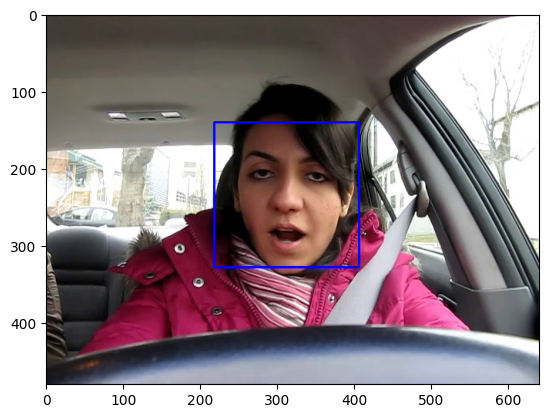

In [6]:
# Test on the test image we loaded earlier
gray_test_image = cv.cvtColor(test_image, cv.COLOR_BGR2GRAY)
faces = face_cascade_classifier.detectMultiScale(gray_test_image, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the faces
for (x, y, w, h) in faces:
    cv.rectangle(test_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(cv.cvtColor(test_image, cv.COLOR_BGR2RGB))

In [7]:
# Define the image size for the model
IMAGE_SIZE = 175

face_yawn_images = []
face_no_yawn_images = []

# Define the function to detect the face in the images and resize them
def detect_face(image):
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    faces = face_cascade_classifier.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        face = cv.resize(face, (IMAGE_SIZE, IMAGE_SIZE))
    return face if len(faces) > 0 else None

# Load the images from the dataset and detect the faces
yawn_images_labels = [labels[1], labels[2]]
print(labels[1])
print(labels[2])
print(labels[0])
print(labels[3])

for label in yawn_images_labels:
    for image in os.listdir(f'data/dataset/{label}'):
        img = cv.imread(f'data/dataset/{label}/{image}')
        face = detect_face(img)
        if face is None:
            continue
        if label == 'yawn':
            face_yawn_images.append(face)
        else:
            face_no_yawn_images.append(face)

# Check the number of images detected
len(face_yawn_images), len(face_no_yawn_images)

no_yawn
yawn
Closed
Open


(242, 225)

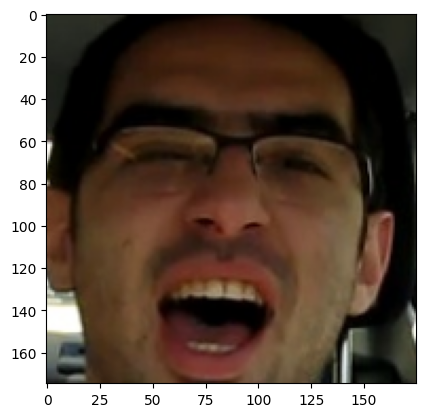

In [8]:
face = face_yawn_images[15]
plt.imshow(cv.cvtColor(face, cv.COLOR_BGR2RGB))

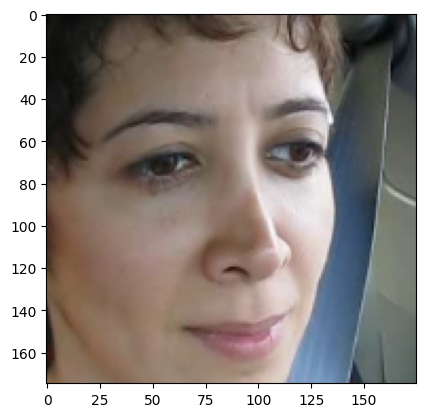

In [9]:
no_yawn = face_no_yawn_images[14]
plt.imshow(cv.cvtColor(no_yawn, cv.COLOR_BGR2RGB))

Code that Isa was working on below

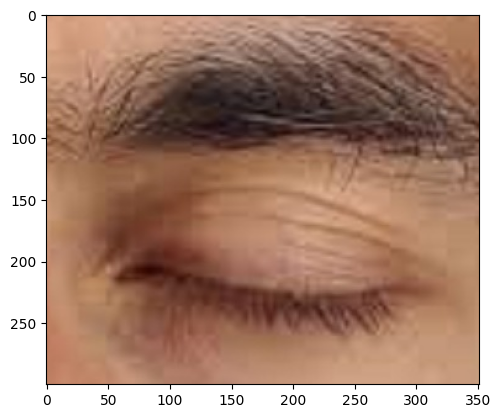

In [11]:
plt.imshow(plt.imread('data/dataset/Closed/_50.jpg'))
test_image = cv.imread('data/dataset/Closed/_50.jpg')

In [12]:
eye_cascade = haarcascades + "haarcascade_eye.xml"
eye_cascade_classifier = cv.CascadeClassifier(eye_cascade)
eye_cascade_classifier


< cv2.CascadeClassifier 0x16bc856b0>

Below is an example of an image where the code doesn't detect the eye but it does work for some of the other image. Feel free to change the param values around to optimize this

2


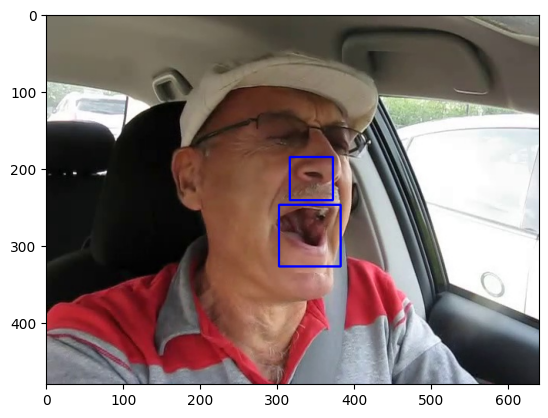

In [55]:
test_image = cv.imread('data/dataset/yawn/235.jpg')
gray_test_image = cv.cvtColor(test_image, cv.COLOR_BGR2GRAY)
eyes = eye_cascade_classifier.detectMultiScale(gray_test_image, scaleFactor=1.1, minNeighbors=10, minSize=(20, 20))
print(len(eyes))
for (x, y, w, h) in eyes:
    cv.rectangle(test_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(cv.cvtColor(test_image, cv.COLOR_BGR2RGB))

In [14]:
# eye_cascade_classifier = cv.CascadeClassifier(eye_cascade)

Here the code is spoonfed already cropped images of eyes and it just further crops them to only extract what it thinks is the eye and not the surrounding skin.

In [85]:
# Load the cascade for eye detection using the haarcascades from OpenCV
eye_cascade = haarcascades + "haarcascade_eye.xml"

# Define the cascade classifier for eye detection
eye_cascade_classifier = cv.CascadeClassifier(eye_cascade)

# Define the function to detect eyes in the images and resize them
def detect_eyes(image):
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    eyes = eye_cascade_classifier.detectMultiScale(gray_image)
    eye_images = []
    for (ex, ey, ew, eh) in eyes:
        eye = image[ey:ey+eh, ex:ex+ew]
        eye = cv.resize(eye, (IMAGE_SIZE, IMAGE_SIZE))
        eye_images.append(eye)
    return eye_images

# Load the images from the dataset and detect the eyes
open_eye_images = []
closed_eye_images = []

# Define the labels for open and closed eyes

eye_labels = ['Open', 'Closed']

for label in eye_labels:
    for image in os.listdir(f'data/dataset/{label}'):
        img = cv.imread(f'data/dataset/{label}/{image}')
        eyes = detect_eyes(img)
        if not eyes:
            continue
        if label == 'Open':
            open_eye_images.extend(eyes)
        else:
            closed_eye_images.extend(eyes)

# Check the number of images detected
len(open_eye_images), len(closed_eye_images)



(944, 845)

I've chosen indexes where it actually shows eyes but if you change the indexes around you will see the examples where the code poorly detects eyes or detects things which are not eyes as eyes. 

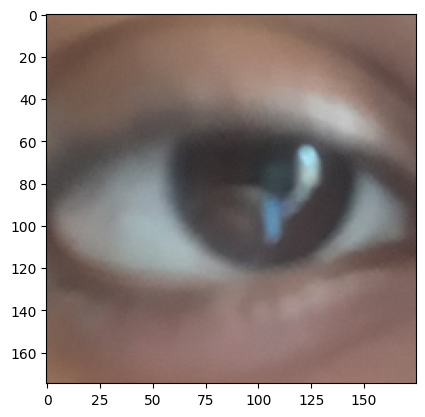

In [99]:
open_eye = open_eye_images[940]
plt.imshow(cv.cvtColor(open_eye, cv.COLOR_BGR2RGB))

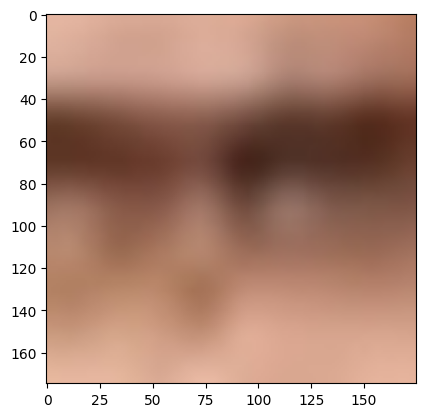

In [94]:
closed_eye = closed_eye_images[300]
plt.imshow(cv.cvtColor(closed_eye, cv.COLOR_BGR2RGB))

This is code to detect images from the cropped face images which were extracted earlier.
The array names are open_eye_images_from_cropped_no_yawn_face and closed_eye_images_from_cropped_yawn_face (super long feel free to change) but in reality just because someone is yawning doesnt mean their eyes will be closed. I said closed eyes in the array name but the code just adds anything it thinks is an eye to the array and same for the open eye array. The code also commonly picks up nostrils, mouths, and car handles as eyes and adds them to the arrays which is not good.

In [63]:
# Load the images from the dataset and detect the eyes
open_eye_images_from_cropped_no_yawn_face = []
closed_eye_images_from_cropped_yawn_face = []

#add eye images 
for image in face_yawn_images:
    eyes = detect_eyes(image)
    if not eyes:
        continue
    closed_eye_images_from_cropped_yawn_face.extend(eyes)

for image in face_no_yawn_images:
    eyes = detect_eyes(image)
    if not eyes:
        continue
    open_eye_images_from_cropped_no_yawn_face.extend(eyes)
    

# Check the number of images detected
len(open_eye_images_from_cropped_no_yawn_face), len(closed_eye_images_from_cropped_yawn_face)

(525, 694)

Feel free to change the array indexes below to see different examples and the examples where the code mistakenly classified parts of the face as an eye

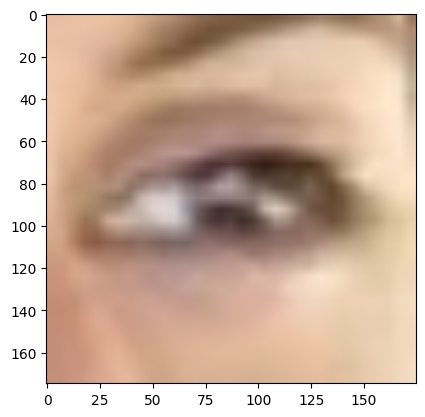

In [69]:
open_eye = open_eye_images_from_cropped_no_yawn_face[359]
plt.imshow(cv.cvtColor(open_eye, cv.COLOR_BGR2RGB))

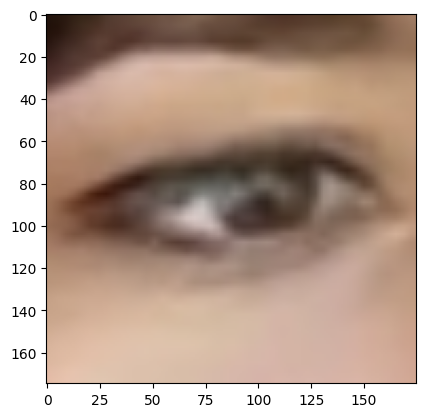

In [74]:
closed_eye = closed_eye_images_from_cropped_yawn_face[569]
plt.imshow(cv.cvtColor(closed_eye, cv.COLOR_BGR2RGB))